# Start H2O

In [1]:
# Start and connect to a local H2O cluster
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,3 days 19 hours 17 mins
H2O cluster timezone:,Europe/London
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.1
H2O cluster version age:,"7 days, 1 hour and 37 minutes"
H2O cluster name:,H2O_started_from_R_jofaichow_ydb410
H2O cluster total nodes:,1
H2O cluster free memory:,3.058 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


# Import Data

In [2]:
# Import house price data from GitHub
train = h2o.import_file("https://github.com/woobe/h2o_training_2018_02/raw/master/examples/regression/house_price_train.csv")
test = h2o.import_file("https://github.com/woobe/h2o_training_2018_02/raw/master/examples/regression/house_price_test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
# Alternatively, import data locally
# train = h2o.import_file("house_price_train.csv")
# test = h2o.import_file("house_price_test.csv")

In [4]:
# Have a quick look
train.head(5)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9


# Define Features

In [5]:
# Define features (or predictors)
features = list(train.columns) # we want to use all the information
features.remove('medv')    # we need to exclude the target 'medv' (otherwise there is nothing to predict)
features

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat']

# Generalized Linear Model (GLM)

In [6]:
# Build a Generalized Linear Model (GLM) with default settings

# Import the function for GLM
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Set up GLM for regression
glm_default = H2OGeneralizedLinearEstimator(family = 'gaussian', model_id = 'glm_default')

# Use .train() to build the model
glm_default.train(x = features, 
                  y = 'medv', 
                  training_frame = train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


# Distributed Random Forest (DRF)

In [7]:
# Build a Distributed Random Forest (DRF) model with default settings

# Import the function for DRF
from h2o.estimators.random_forest import H2ORandomForestEstimator

# Set up DRF for regression
# Add a seed for reproducibility
drf_default = H2ORandomForestEstimator(model_id = 'drf_default', seed = 1234)

# Use .train() to build the model
drf_default.train(x = features, 
                  y = 'medv', 
                  training_frame = train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


# Gradient Boosting Machine (GBM)

In [8]:
# Build a Gradient Boosting Machines (GBM) model with default settings

# Import the function for GBM
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# Set up GBM for regression
# Add a seed for reproducibility
gbm_default = H2OGradientBoostingEstimator(model_id = 'gbm_default', seed = 1234)

# Use .train() to build the model
gbm_default.train(x = features, 
                  y = 'medv', 
                  training_frame = train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


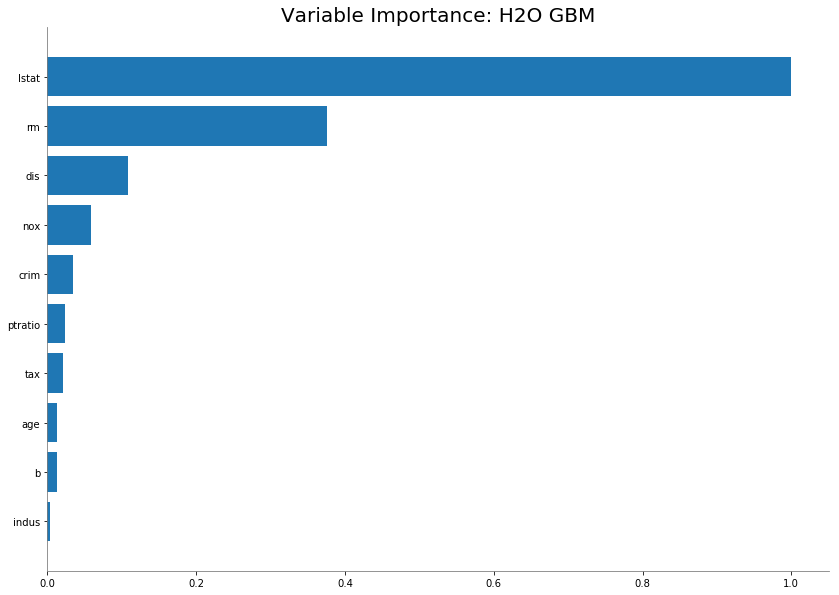

In [9]:
gbm_default.varimp_plot()

# Deep Neural Networks (DNN)

In [10]:
# Build a Deep Learning (Deep Neural Networks, DNN) model with default settings

# Import the function for DNN
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

# Set up DNN for regression
dnn_default = H2ODeepLearningEstimator(model_id = 'dnn_default')

# (not run) Change 'reproducible' to True if you want to reproduce the results
# The model will be built using a single thread (could be very slow)
# dnn_default = H2ODeepLearningEstimator(model_id = 'dnn_default', reproducible = True)

# Use .train() to build the model
dnn_default.train(x = features, 
                  y = 'medv', 
                  training_frame = train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


# AutoML

In [11]:
# Build multiple H2O models and stacked ensembles with AutoML

# Import the function
from h2o.automl import H2OAutoML

# Run AutoML for 30 seconds
aml = H2OAutoML(max_runtime_secs = 30)

aml.train(x = features, 
          y = 'medv',
          training_frame = train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mae,rmsle
GBM_grid_0_AutoML_20180220_061327_model_17,9.00314,3.00052,2.1088,0.132865
StackedEnsemble_BestOfFamily_0_AutoML_20180220_061327,9.02606,3.00434,2.08334,0.132228
StackedEnsemble_AllModels_0_AutoML_20180220_061327,9.27243,3.04507,2.11926,0.132598
GBM_grid_0_AutoML_20180220_061327_model_0,9.47915,3.07882,2.15842,0.137468
GBM_grid_0_AutoML_20180220_061327_model_2,9.57026,3.09358,2.15251,0.135438
GBM_grid_0_AutoML_20180220_061327_model_20,9.85258,3.13888,2.21929,0.141201
GBM_grid_0_AutoML_20180220_061327_model_1,10.1996,3.19369,2.19673,0.139343
GBM_grid_0_AutoML_20180220_061327_model_3,11.4983,3.39092,2.29573,0.146836
GBM_grid_0_AutoML_20180220_061327_model_8,11.8744,3.44592,2.40767,0.152187
DRF_0_AutoML_20180220_061327,12.0756,3.475,2.41142,0.150721


# Evaluate

In [12]:
aml.leader.model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 10.802087447624594
RMSE: 3.286652924728225
MAE: 2.311737095309379
RMSLE: 0.16067220832474405
Mean Residual Deviance: 10.802087447624594


# Make Predictions

In [13]:
yhat_test = aml.leader.predict(test)
yhat_test.head(5)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
26.2866
26.2327
16.4371
14.6721
14.1186
